### Data
Source: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/BankChurners.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

### Columns description:
<b> CLIENTNUM:</b> Client number. Unique identifier for the customer holding the account <br>
<b> Attrition_Flag:</b> Internal event (customer activity) variable - if the account is closed then 1 else 0 <br>
<b> Customer_Age:</b> Demographic variable - Customer's Age in Years <br>
<b> Gender:</b> Demographic variable - M=Male, F=Female <br>
<b> Dependent_count:</b> Demographic variable - Number of dependents <br>
<b> Education_Level:</b> Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) <br>
<b> Marital_Status:</b> Demographic variable - Married, Single, Divorced, Unknown <br>
<b> Income_Category:</b> Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > <br>
<b> Card_Category:</b> Product Variable - Type of Card (Blue, Silver, Gold, Platinum) <br>
<b> Months_on_book:</b> Period of relationship with bank <br>
<b> Total_Relationship_Count:</b> Total no. of products held by the customer <br>
<b> Months_Inactive_12_mon:</b> No. of months inactive in the last 12 months <br>
<b> Contacts_Count_12_mon:</b> No. of Contacts in the last 12 months <br>
<b> Credit_Limit:</b> Credit Limit on the Credit Card <br>
<b> Total_Revolving_Bal:</b> Total Revolving Balance on the Credit Card <br>
<b> Avg_Open_To_Buy:</b> Open to Buy Credit Line (Average of last 12 months) <br>
<b> Total_Amt_Chng_Q4_Q1:</b> Change in Transaction Amount (Q4 over Q1) <br>
<b> Total_Trans_Amt:</b> Total Transaction Amount (Last 12 months) <br>
<b> Total_Trans_Ct:</b> Total Transaction Count (Last 12 months) <br>
<b> Total_Ct_Chng_Q4_Q1:</b> Change in Transaction Count (Q4 over Q1) <br>
<b> Avg_Utilization_Ratio:</b> Average Card Utilization Ratio <br>


In [5]:
data.select_dtypes(include='object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [6]:
data.select_dtypes(include=['int64','float64']).columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Basic Feature Engineering

In [7]:
# Create a new numeric column based on 'Attrition_Flag'
data['Attrited_Customer'] = np.where(data['Attrition_Flag'] == 'Existing Customer', 0, 1)
data['Attrited_Customer'].value_counts()

Attrited_Customer
0    8500
1    1627
Name: count, dtype: int64

## 📈 Data Exploration

In [21]:
# Average Expected Value for Attrited Customer
overall_average_attrition_rate = data['Attrited_Customer'].value_counts(normalize=True)[1]*100

In [22]:
# Churn distribution
print(data['Attrition_Flag'].value_counts())
print('--------------------------------')
print(round(data["Attrition_Flag"].value_counts(normalize=True)*100,2))

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
--------------------------------
Attrition_Flag
Existing Customer    83.93
Attrited Customer    16.07
Name: proportion, dtype: float64


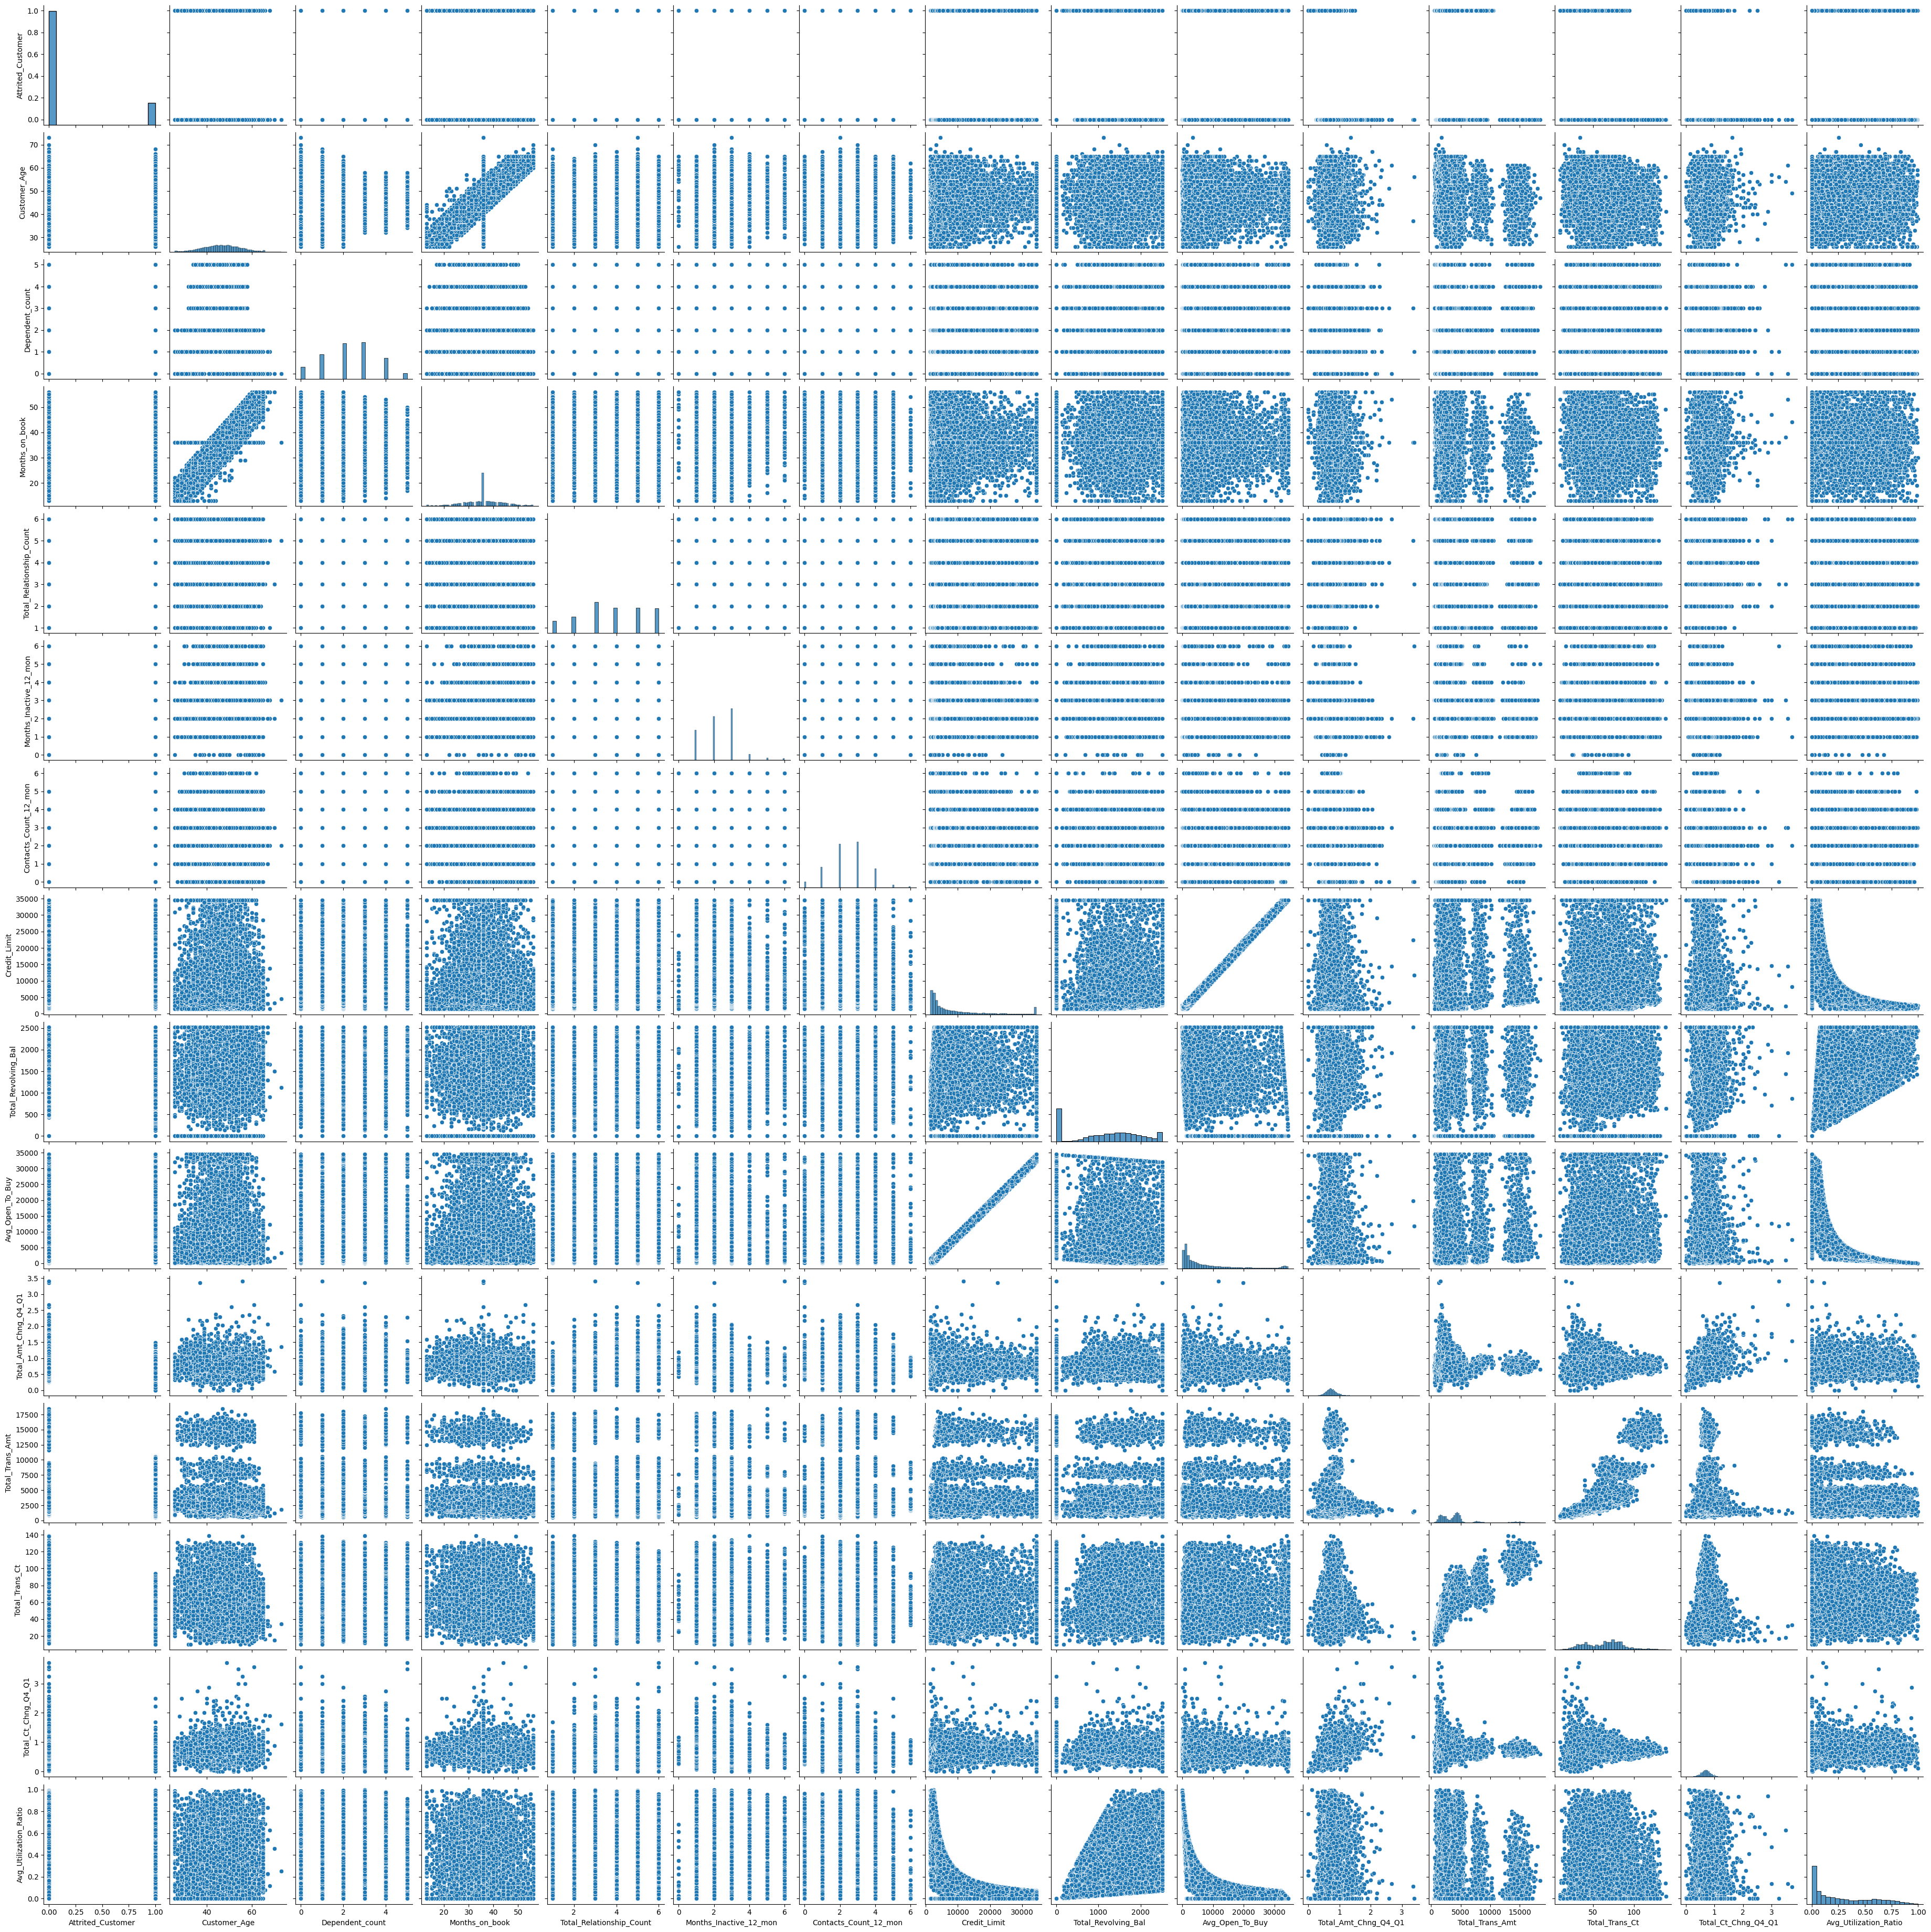

In [23]:
sns.pairplot(data[['Attrited_Customer','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']])

<Axes: >

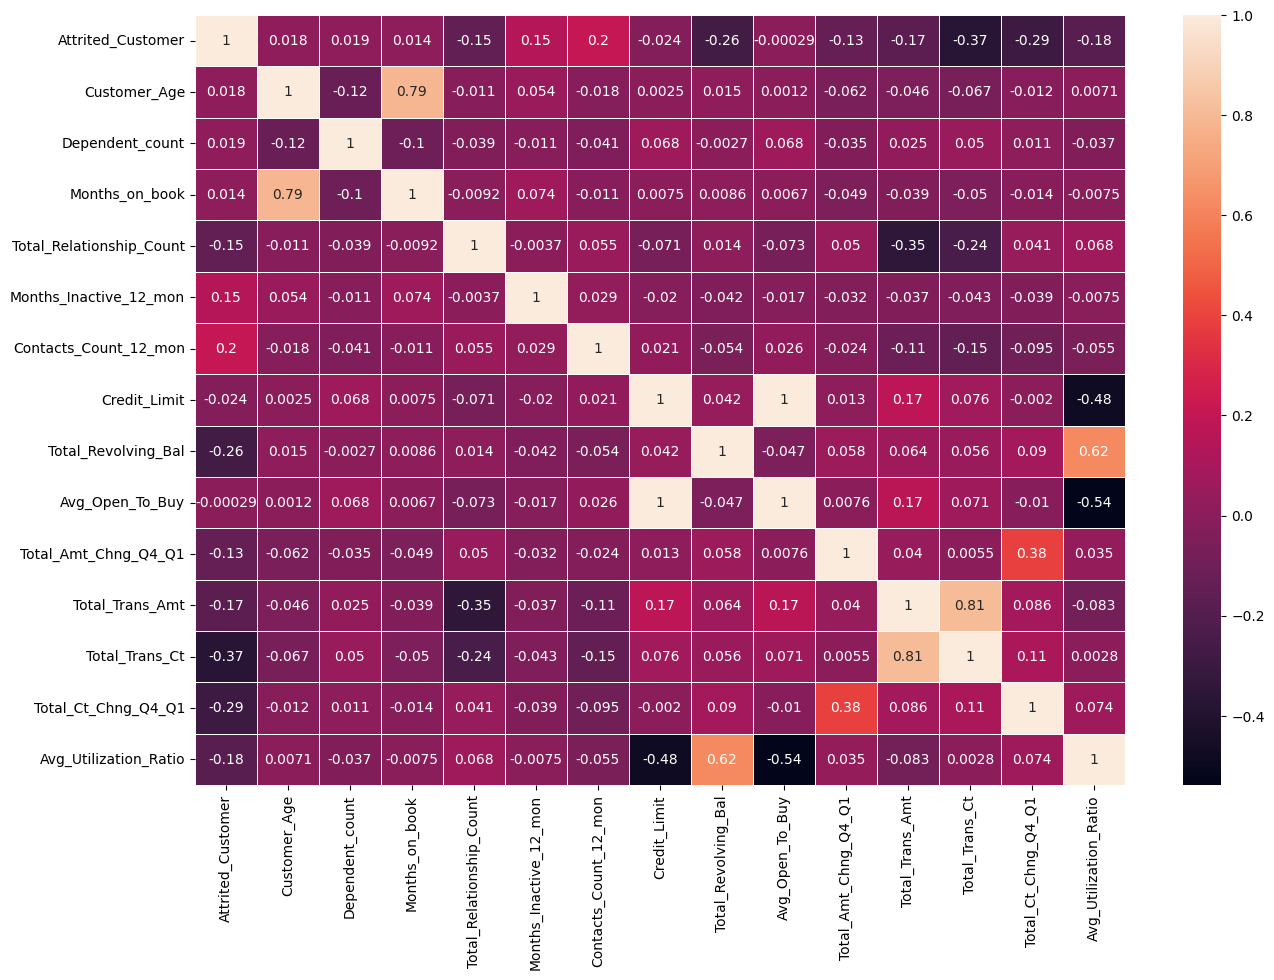

In [24]:
# Calculate the correlation matrix
corr = data[['Attrited_Customer','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].corr()

# Plot the Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidth=.5)

In [71]:
def analysis_categorical_plot(df, column, show_values=False):
    '''
    Function to group 
    '''
    # Group the Dataframe by column
    data_grouped = df.groupby(column).agg(
        Total_Customers=(column, 'count'),  # Count the number of rows for each column
        Attrited_Customers=('Attrited_Customer', 'sum')  # Sum up the Attrited_Customer column values    
    ).reset_index()

    # Calculate the percentage of attrited customers
    data_grouped['Attrition_Rate'] = (data_grouped['Attrited_Customers'] / data_grouped['Total_Customers']) * 100

    # Subplot
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot 1: Total customers by column
    
    ax[0].bar(data_grouped[column], data_grouped['Total_Customers'])
    ax[0].set_title(f'Total Customers by {column}')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of Customers')
    ax[0].tick_params(labelrotation=90)

    plt.xticks(rotation=90)
    
    # Plot 2: Percentage of Attrited Customers by column
    bars = ax[1].bar(data_grouped[column], data_grouped['Attrition_Rate'])
    # ax[1].bar(data_grouped[column], data_grouped['Attrition_Rate'])
    ax[1].set_title(f'Attrition Rate by {column}')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Attrition Rate (%)')
    ax[1].tick_params(labelrotation=90)
    ax[1].axhline(overall_average_attrition_rate, color='red', linestyle='--', label='Average Attrition Rate')
    ax[1].legend()

    if show_values:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


    plt.tight_layout()
    plt.show()

    print(data_grouped.to_string(index=False))
    


In [72]:
data.select_dtypes(include='object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

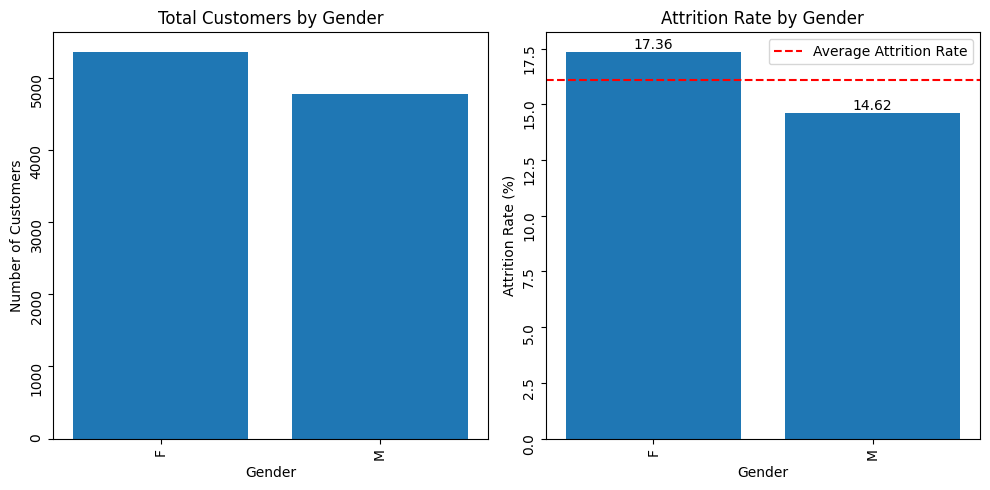

Gender  Total_Customers  Attrited_Customers  Attrition_Rate
     F             5358                 930       17.357223
     M             4769                 697       14.615223


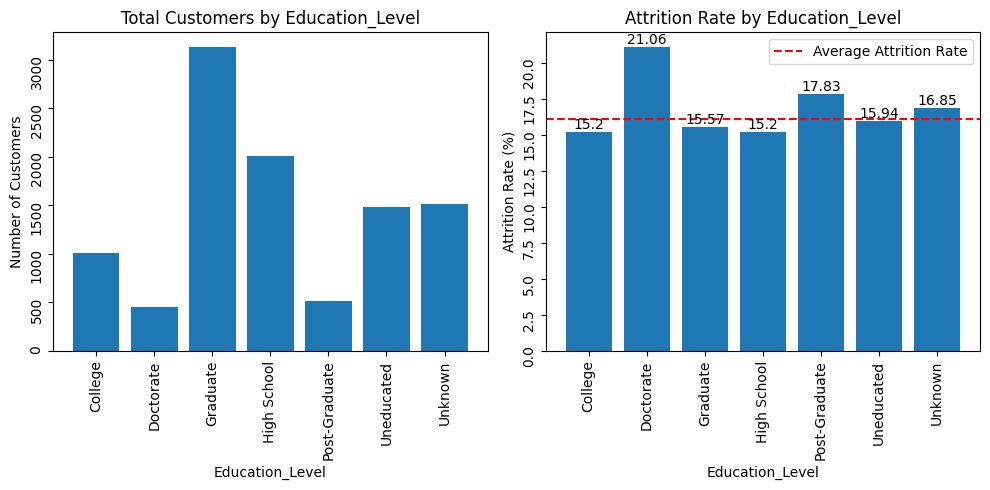

Education_Level  Total_Customers  Attrited_Customers  Attrition_Rate
        College             1013                 154       15.202369
      Doctorate              451                  95       21.064302
       Graduate             3128                 487       15.569054
    High School             2013                 306       15.201192
  Post-Graduate              516                  92       17.829457
     Uneducated             1487                 237       15.938130
        Unknown             1519                 256       16.853193


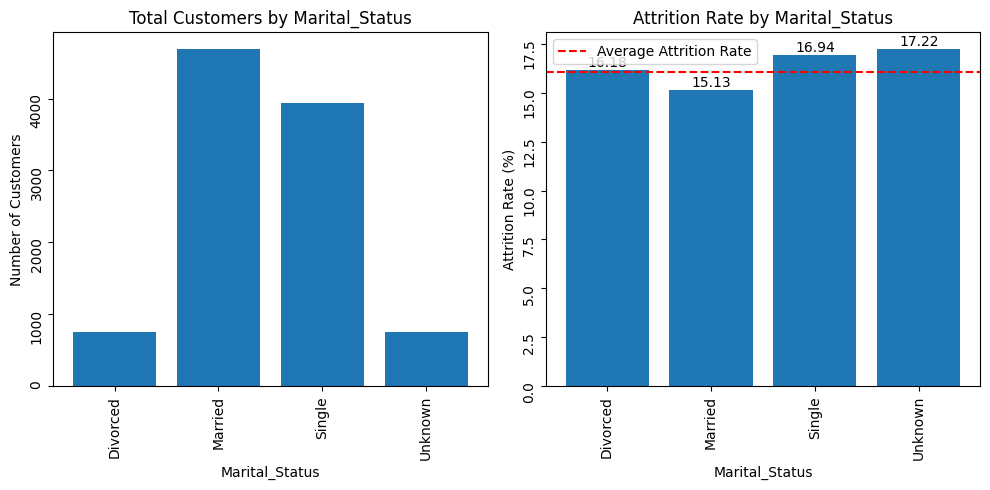

Marital_Status  Total_Customers  Attrited_Customers  Attrition_Rate
      Divorced              748                 121       16.176471
       Married             4687                 709       15.126947
        Single             3943                 668       16.941415
       Unknown              749                 129       17.222964


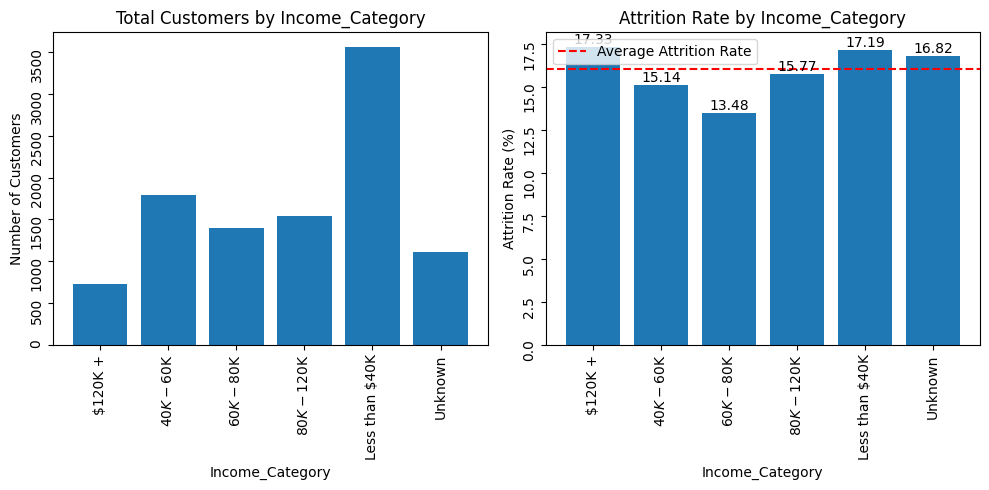

Income_Category  Total_Customers  Attrited_Customers  Attrition_Rate
        $120K +              727                 126       17.331499
    $40K - $60K             1790                 271       15.139665
    $60K - $80K             1402                 189       13.480742
   $80K - $120K             1535                 242       15.765472
 Less than $40K             3561                 612       17.186184
        Unknown             1112                 187       16.816547


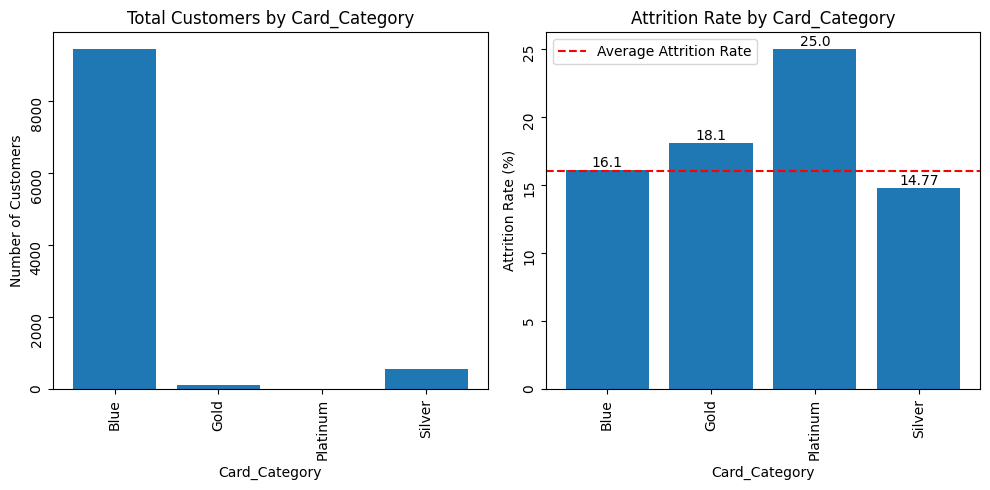

Card_Category  Total_Customers  Attrited_Customers  Attrition_Rate
         Blue             9436                1519       16.097923
         Gold              116                  21       18.103448
     Platinum               20                   5       25.000000
       Silver              555                  82       14.774775


In [73]:
analysis_categorical_plot(data,'Gender', show_values=True)
analysis_categorical_plot(data,'Education_Level', show_values=True)
analysis_categorical_plot(data,'Marital_Status', show_values=True)
analysis_categorical_plot(data,'Income_Category', show_values=True)
analysis_categorical_plot(data,'Card_Category', show_values=True)

In [42]:
overall_average_attrition_rate

16.065962279055988